<a href="https://colab.research.google.com/github/EunjaeHan/ML/blob/main/9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%ED%95%9C%EC%9D%80%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')

In [6]:
# 2. 데이터 확인 및 전처리
data = df['S4248SM144NCEN'].values.reshape(-1, 1)

In [7]:
# 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
# 시퀀스 생성
window = 12  # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data) - window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# --- Train/Test 분할 ---
split = int(len(X) * 0.8)  # 80%를 train으로 사용
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
# 3. LSTM 모델 정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# 학습 실행
print("--- 모델 학습 시작 ---")
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)
print("--- 모델 학습 완료 ---")

# 최종 로스 값 추출
final_loss = history.history['loss'][-1]

--- 모델 학습 시작 ---
--- 모델 학습 완료 ---


In [13]:
# 4. 예측
pred = model.predict(X_test)

# 실제 값과 예측 값 역정규화
true_values = scaler.inverse_transform(y_test)
predicted_values = scaler.inverse_transform(pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step


In [14]:
final_loss = history.history['loss'][-1]

# 테스트셋 평가 추가
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 데이터 MSE: {test_loss:.6f}")

# 4. 예측
pred = model.predict(X_test)


테스트 데이터 MSE: 0.008602
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step



최종 학습 로스 (MSE): 0.002060


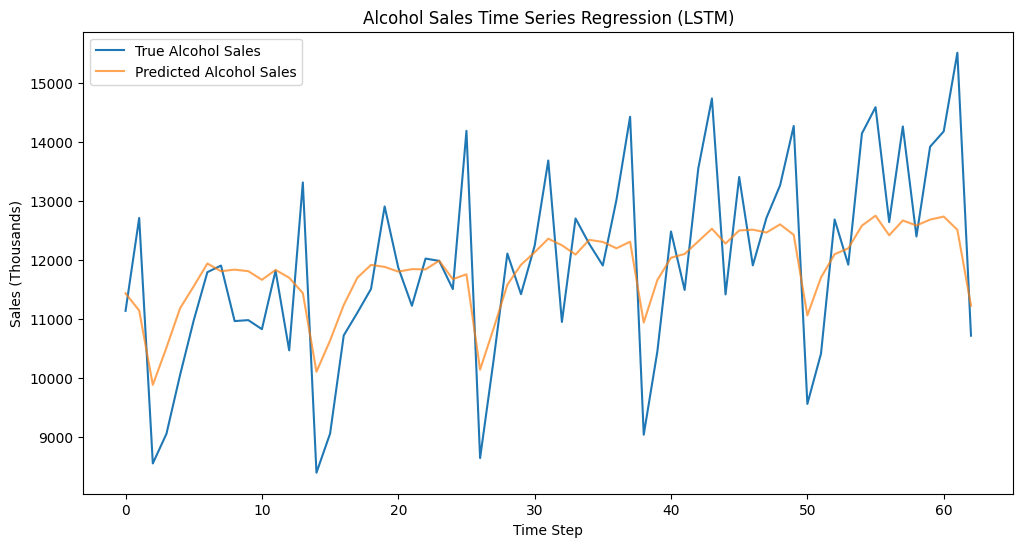

In [15]:
# 5. 시각화
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Alcohol Sales')
plt.plot(predicted_values, label='Predicted Alcohol Sales', alpha=0.7)
plt.title('Alcohol Sales Time Series Regression (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Sales (Thousands)')
plt.legend()
plt.savefig('alcohol_sales_regression_result.png')

print(f"\n최종 학습 로스 (MSE): {final_loss:.6f}")

# 최종 코드 정리

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- SimpleRNN 모델 학습 시작 ---
--- SimpleRNN 모델 학습 완료 ---
SimpleRNN Train MSE: 0.000883
SimpleRNN Test  MSE: 0.002889
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step

--- LSTM 모델 학습 시작 ---
--- LSTM 모델 학습 완료 ---
LSTM Train MSE: 0.002585
LSTM Test  MSE: 0.009065
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


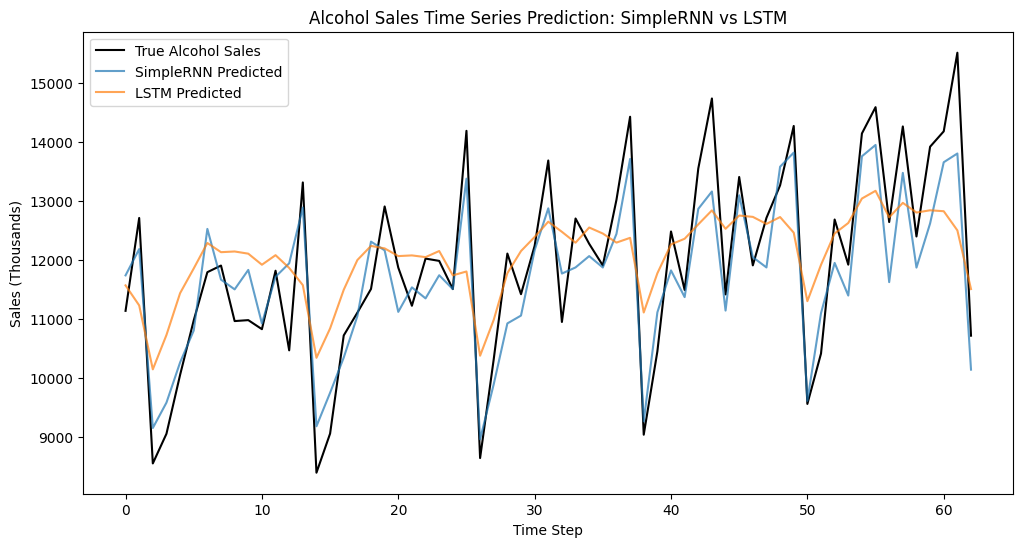


====== 최종 비교 결과 ======
SimpleRNN Train MSE: 0.000883 | Test MSE: 0.002889
LSTM      Train MSE: 0.002585 | Test MSE: 0.009065


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')

# 2. 데이터 전처리
data = df['S4248SM144NCEN'].values.reshape(-1, 1)

# 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 시퀀스 생성 (12개월 → 다음달 예측)
window = 12
X, y = [], []
for i in range(len(data) - window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# Train/Test 분할
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ==============================
# 1️⃣ SimpleRNN 모델 정의 및 학습
# ==============================
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
print("\n--- SimpleRNN 모델 학습 시작 ---")
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)
print("--- SimpleRNN 모델 학습 완료 ---")

# 손실 계산
rnn_train_loss = rnn_history.history['loss'][-1]
rnn_test_loss = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"SimpleRNN Train MSE: {rnn_train_loss:.6f}")
print(f"SimpleRNN Test  MSE: {rnn_test_loss:.6f}")

# 예측
rnn_pred = rnn_model.predict(X_test)

# ==============================
# 2️⃣ LSTM 모델 정의 및 학습
# ==============================
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
print("\n--- LSTM 모델 학습 시작 ---")
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)
print("--- LSTM 모델 학습 완료 ---")

# 손실 계산
lstm_train_loss = lstm_history.history['loss'][-1]
lstm_test_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Train MSE: {lstm_train_loss:.6f}")
print(f"LSTM Test  MSE: {lstm_test_loss:.6f}")

# 예측
lstm_pred = lstm_model.predict(X_test)

# ==============================
# 3️⃣ 예측 결과 역정규화 및 시각화
# ==============================
true_values = scaler.inverse_transform(y_test)
rnn_predicted = scaler.inverse_transform(rnn_pred)
lstm_predicted = scaler.inverse_transform(lstm_pred)

plt.figure(figsize=(12, 6))
plt.plot(true_values, label='True Alcohol Sales', color='black')
plt.plot(rnn_predicted, label='SimpleRNN Predicted', alpha=0.7)
plt.plot(lstm_predicted, label='LSTM Predicted', alpha=0.7)
plt.title('Alcohol Sales Time Series Prediction: SimpleRNN vs LSTM')
plt.xlabel('Time Step')
plt.ylabel('Sales (Thousands)')
plt.legend()
plt.savefig('alcohol_sales_RNN_LSTM_comparison.png')
plt.show()

# ==============================
# 4️⃣ 결과 요약 출력
# ==============================
print("\n====== 최종 비교 결과 ======")
print(f"SimpleRNN Train MSE: {rnn_train_loss:.6f} | Test MSE: {rnn_test_loss:.6f}")
print(f"LSTM      Train MSE: {lstm_train_loss:.6f} | Test MSE: {lstm_test_loss:.6f}")
